# Project: AI for Early Diabetes Prediction

## Introduction

In an era where preventive healthcare is gaining paramount importance, the early prediction of diseases like diabetes holds significant value. Diabetes, a chronic condition characterized by high blood sugar levels, affects millions of people worldwide and can lead to severe complications if left untreated. Early identification and intervention are crucial in managing diabetes and improving patient outcomes.

This project aims to harness machine learning techniques to predict the onset of diabetes by analyzing diverse health parameters. By developing a precise classification system, the project seeks to enable early identification of individuals at risk of developing diabetes, thereby facilitating timely interventions and potentially reducing the burden of the disease on healthcare systems.

## Objectives
- Develop a machine learning model capable of accurately predicting the onset of diabetes based on health parameters.
- Utilize diverse datasets containing medical history, lifestyle factors, and biomarkers associated with diabetes risk.
- Implement preprocessing techniques to clean and prepare the data for modeling.
- Train and evaluate various machine learning algorithms to identify the most effective model for diabetes prediction.
- Develop a user-friendly interface to allow users to input health parameters and receive predicted diabetes risk.

## Methodology:

 ### Data Acquisition and Preprocessing:
    
  1-***Data Collection***: Obtain a comprehensive dataset containing diverse health parameters such as medical history, lifestyle factors, and biomarkers associated with diabetes risk.
  
  2-***Data Preprocessing***: Clean the dataset to handle missing values, normalize features, and ensure data consistency.

 ### Exploratory Data Analysis (EDA):
    
   1-***Exploratory Analysis***: Conduct exploratory data analysis to understand the distribution and relationships between different health parameters and the target variable (diabetes).
   
   2-***Visualizations***: Utilize visualizations such as histograms, scatter plots, and correlation matrices to identify patterns and potential insights in the data.

 ### Model Development:
        
   1-***Feature Engineering***: Engineer new features or transformations based on domain knowledge to enhance the predictive power of the models.
   
   2-***Model Selection***: Train various machine learning models including logistic regression, decision trees, random forests, support vector machines (SVM), and deep neural networks.
   
   3-***Hyperparameter Tuning***: Optimize model hyperparameters using techniques like cross-validation to improve model performance.

 ### Validation and Evaluation:
 
   1-***Validation***: Validate models using rigorous techniques such as cross-validation or train-test splits to ensure they generalize well to unseen data.
   
   2-***Evaluation Metrics***: Assess model performance using metrics such as accuracy, precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC).
   
   3-***Model Comparison***: Compare the performance of different machine learning models to identify the most effective approach for early diabetes prediction.

  ### Interpretation and Documentation:
  
  1-***Interpretation***: Interpret the findings from the models, including key features contributing to diabetes prediction and any potential insights into risk factors.
  
   2-***Documentation***: Summarize the project objectives, methodologies, datasets, and experimental results in a comprehensive report.
   
   3-***Communication***: Communicate the results to domain experts, stakeholders, and the wider community, highlighting the implications for preventive healthcare and future research directions.

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter


In [2]:
from utils import *

# Data Import

In [4]:
Db_path='diabetes_prediction_dataset.csv'
Diab_df = pd.read_csv(Db_path)

# Explore the data

In [5]:
# Display the first few rows of the DataFrame
print(Diab_df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [19]:
# Get information about the dataset
print(Diab_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [20]:
# Summary statistics for numerical features
print(Diab_df.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

   **Age**: The average age of individuals in the dataset is approximately 41.89 years, with a standard deviation of 22.52. The age range spans from 0.08 to 80 years.
   
**Hypertension**: Around 7.49% of individuals in the dataset have hypertension.
**Heart Disease**: Approximately 3.94% of individuals have a history of heart disease.
    
**BMI (Body Mass Index)**: The average BMI is 27.32, with values ranging from 10.01 to 95.69. This suggests a wide variation in BMI among individuals in the dataset.

**HbA1c Level**: The average HbA1c level is 5.53, with values ranging from 3.5 to 9. Higher HbA1c levels may indicate poorer blood sugar control.

**Blood Glucose Level**: The average blood glucose level is 138.06 mg/dL, with values ranging from 80 to 300 mg/dL. Monitoring blood glucose levels is essential for diabetes management.

**Diabetes: Approximately 8.5% of individuals in the dataset have diabetes, which may indicate an *imbalanced class distribution*.**

# Preprocess the data

## Questions to Explore

### Question 1:
Does the dataset contain missing values, and if so, how are they distributed across features?

### Question 2:
Are there any outliers present in the numerical features, and how might they impact model training?

### Question 3:
Is the target variable "Diabetes" balanced or imbalanced, and how might this imbalance affect model performance?


## Handle Missing Values

In [6]:
# Check for missing values
missing_values = Diab_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Based on the output, we did not observe any missing values in the dataset. All features have a count of 0, indicating that there are no missing values in all the features.

## Explore Outliers

In [22]:

# Iterate over each numerical feature and identify outliers
numerical_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for feature in numerical_features:
    identify_outliers(Diab_df,feature)

Feature: age
Number of Outliers: 0
Percentage of Outliers: 0.00%
------------------------------------


Feature: hypertension
Number of Outliers: 7485
Percentage of Outliers: 7.49%
------------------------------------
Feature: heart_disease
Number of Outliers: 3942
Percentage of Outliers: 3.94%
------------------------------------
Feature: bmi
Number of Outliers: 7086
Percentage of Outliers: 7.09%
------------------------------------
Feature: HbA1c_level
Number of Outliers: 1315
Percentage of Outliers: 1.31%
------------------------------------
Feature: blood_glucose_level
Number of Outliers: 2038
Percentage of Outliers: 2.04%
------------------------------------


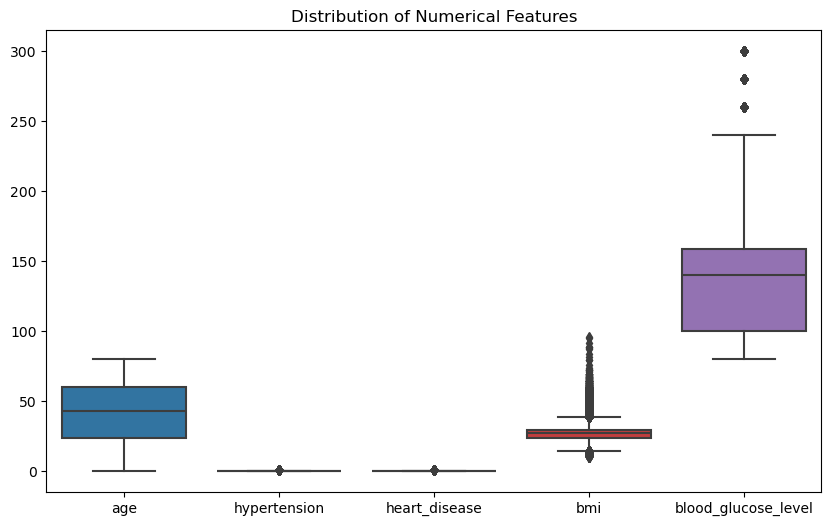

In [23]:
# Visualize the distribution of numerical features to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=Diab_df[['age', 'hypertension', 'heart_disease', 'bmi', 'blood_glucose_level']])
plt.title('Distribution of Numerical Features')
plt.show()

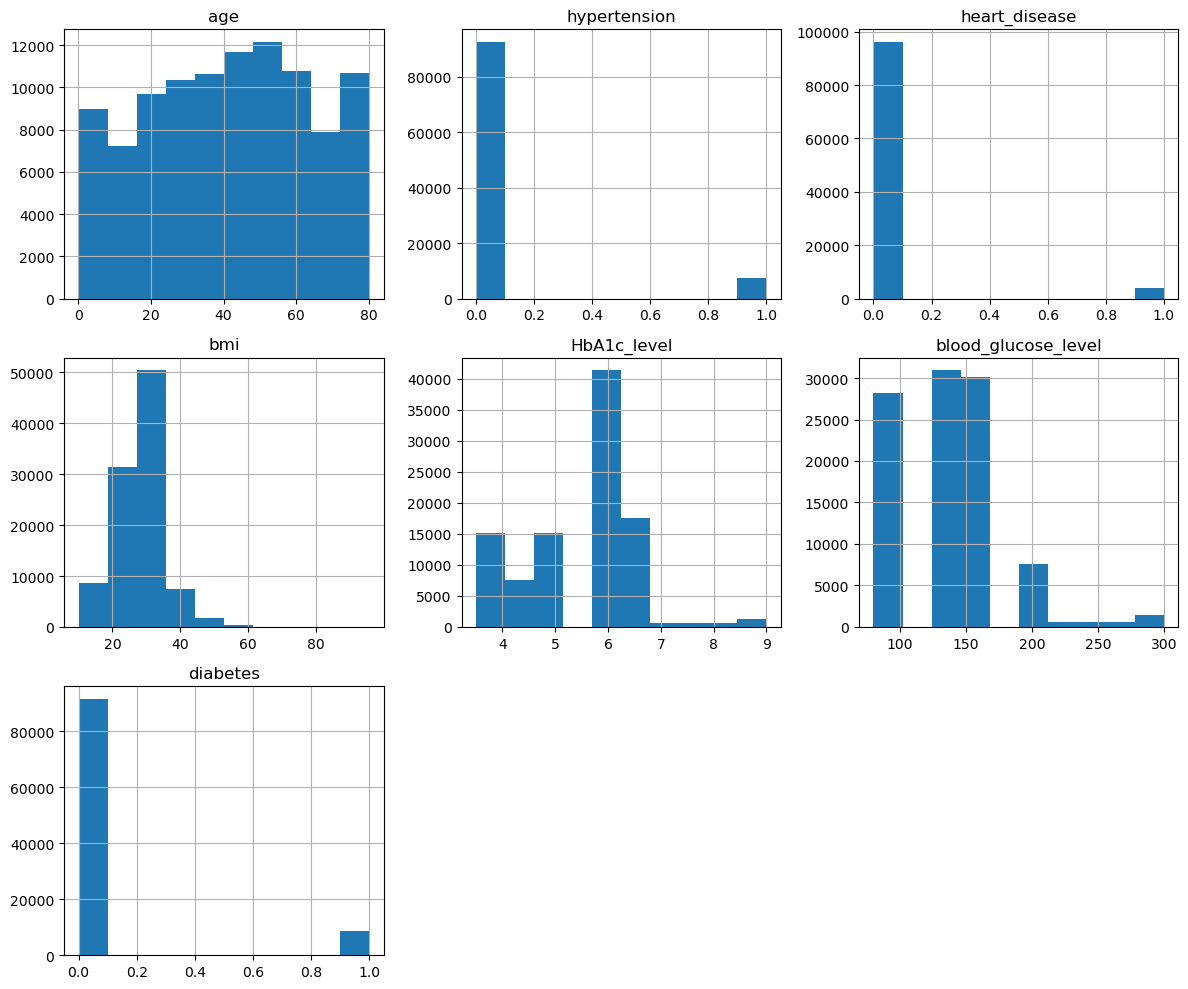

In [24]:
# Plot histograms for numerical features
Diab_df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


Based on the stastics and visualization, Outliers in BMI, heart_disease, glucose_level could signify extreme weight values that deviate significantly from the majority of the dataset. These outliers may have implications for health assessments and may influence model predictions, especially in the context of diabetes prediction where they are often a relevant factor.

In [25]:
# Pair plot for numeric features
# sns.pairplot(Diab_df, hue='diabetes')
# plt.show()



### Encode categorical features 

In [7]:
Diab_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [27]:
# Check unique values in each column
for column in Diab_df.columns:
    unique_values = Diab_df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'gender': ['Female' 'Male' 'Other']
Unique values in column 'age': [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
Unique values in column 'hypertension': [0 1]
Unique values in column 'heart_disease': [1 0]
Unique values in column 'smoking_history': ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Unique values in column 'bmi': [25.19 27.32 23.45 ... 59.42 44.39 60.52]
Unique values in column 'HbA

In [14]:
# Define mapping dictionaries
gender_mapping = {'Male': 1, 'Female': 0, 'Other':2}
smoking_mapping = {'No Info': 0, 'current': 1, 'never':3,'ever':4, 'former':5, 'not current':6}

# Map values to numerical representations
Diab_df['gender_encoded'] = Diab_df['gender'].map(gender_mapping)
Diab_df['smoking_encoded'] = Diab_df['smoking_history'].map(smoking_mapping)

# Drop the original 'gender' and 'smoking_history' columns
Diab_df.drop(columns=['gender', 'smoking_history'], inplace=True)
 
Diab_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_encoded
0,80.0,0,1,25.19,6.6,140,0,0,3
1,54.0,0,0,27.32,6.6,80,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,3
3,36.0,0,0,23.45,5.0,155,0,0,1
4,76.0,1,1,20.14,4.8,155,0,1,1


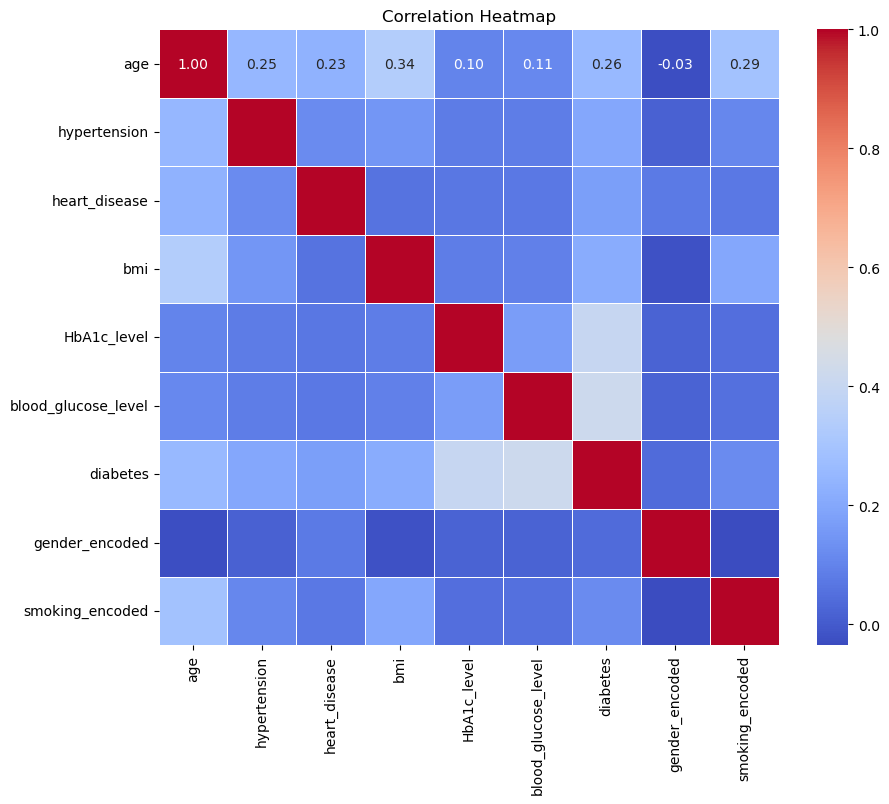

In [29]:
# Compute the correlation matrix
corr = Diab_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [30]:
# Check for missing values in the dataset
missing_values = Diab_df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
gender_encoded         0
smoking_encoded        0
dtype: int64


## Check for Data Imbalance


In [12]:
# Investigate the distribution of classes within the target variable 'diabetes'
class_distribution = Diab_df['diabetes'].value_counts()
print("Class Distribution:\n", class_distribution)


Class Distribution:
 diabetes
0    91500
1     8500
Name: count, dtype: int64


The target variable "Diabetes" has a distribution where approximately 8.5% of individuals have diabetes. This suggests that the dataset is imbalanced, with a majority of individuals not having diabetes.

Imbalanced datasets can pose challenges for model training, as models may be biased towards the majority class and have difficulty learning from the minority class. This imbalance could lead to lower predictive performance, particularly for the minority class (i.e., individuals with diabetes). 
Techniques such as **oversampling, undersampling**, or using algorithms designed to handle class imbalance (e.g., **SMOTE**) may be necessary to address this issue and improve model performance.



## Deal with Class imbalance

### using SMOTE (Synthetic Minority Over-sampling Technique) 

In [15]:
# Separate features and target variable
X = Diab_df.drop(columns=['diabetes'])
y = Diab_df['diabetes']

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display class distribution before and after SMOTE
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution before SMOTE: Counter({0: 91500, 1: 8500})
Class distribution after SMOTE: Counter({0: 91500, 1: 91500})


In [33]:
Diab_df.shape

(100000, 9)

## Train Data ( Bagging) 

In [16]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [19]:
y_test

180328    1
573       0
13494     0
93981     0
75389     0
         ..
115976    1
70132     0
121630    1
172558    1
150997    1
Name: diabetes, Length: 36600, dtype: int64

In [46]:
X_train

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_encoded,smoking_encoded
140081,51.888248,0,0,35.021792,6.000000,145,0,3
118592,80.000000,1,1,27.344644,6.528092,220,0,5
72054,2.000000,0,0,24.050000,6.600000,90,1,3
2657,37.000000,0,0,27.320000,6.200000,145,1,0
38473,27.000000,0,0,21.250000,6.100000,145,0,4
...,...,...,...,...,...,...,...,...
119879,38.191110,0,0,50.162757,7.213334,126,0,1
103694,78.024174,0,1,27.320000,5.721757,130,0,4
131932,57.000000,0,0,28.687631,7.103384,155,0,3
146867,63.895303,0,0,32.273718,6.740803,240,1,0


### using DecisionTree  Classifier

In [17]:
# Initialize base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(random_state=42)

# Initialize BaggingClassifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=20, random_state=42)

# Train the BaggingClassifier
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=20, random_state=42)

In [18]:
# Make predictions
y_pred = bagging_classifier.predict(X_test)

 #Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n", cm)

# Generate a classification report
cr = classification_report(y_test, y_pred)
print("\n Classification report: \n", cr)


Accuracy: 0.9812841530054645

Confusion matrix: 
 [[18066   227]
 [  458 17849]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     18293
           1       0.99      0.97      0.98     18307

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600



In [20]:
import gradio as gr 

In [23]:
# def predict(age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, gender, smoking):
#     # Map string inputs to encoded values
#     gender_encoded = gender_mapping[gender]
#     smoking_encoded = smoking_mapping[smoking]
    
#     # Create an input array
#     input_data = np.array([[age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, gender_encoded, smoking_encoded]])
    
#     # Predict using the trained model
#     prediction = bagging_classifier.predict(input_data)
    
#     return int(prediction[0])

# # Define the Gradio interface
# input_components = [
#     gr.inputs.Number(label="Age"),
#     gr.inputs.Radio(choices=[0, 1], label="Hypertension"),  # Assuming binary input
#     gr.inputs.Radio(choices=[0, 1], label="Heart Disease"),  # Assuming binary input
#     gr.inputs.Number(label="BMI"),
#     gr.inputs.Number(label="HbA1c Level"),
#     gr.inputs.Number(label="Blood Glucose Level"),
#     gr.inputs.Dropdown(choices=["Male", "Female", "Other"], label="Gender"),
#     gr.inputs.Dropdown(choices=["No Info", "Current", "Never", "Ever", "Former", "Not Current"], label="Smoking Status")
# ]

# output_component = gr.outputs.Textbox(label="Prediction")

# interface = gr.Interface(fn=predict, inputs=input_components, outputs=output_component)

# # Launch the Gradio interface
# interface.launch()

def predict(age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, gender, smoking):
    # Map string inputs to encoded values
    gender_encoded = gender_mapping[gender]
    smoking_encoded = smoking_mapping[smoking]
    
    # Create an input array
    input_data = np.array([[age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, gender_encoded, smoking_encoded]])
    
    # Predict using the trained model
    prediction = bagging_classifier.predict(input_data)
    
    return int(prediction[0])

# Define the Gradio interface
input_components = [
    gr.inputs.Number(label="Age"),
    gr.inputs.Radio(choices=[0, 1], label="Hypertension"),  # Assuming binary input
    gr.inputs.Radio(choices=[0, 1], label="Heart Disease"),  # Assuming binary input
    gr.inputs.Number(label="BMI"),
    gr.inputs.Number(label="HbA1c Level"),
    gr.inputs.Number(label="Blood Glucose Level"),
    gr.inputs.Dropdown(choices=["Male", "Female", "Other"], label="Gender"),
    gr.inputs.Dropdown(choices=["No Info", "Current", "Never", "Ever", "Former", "Not Current"], label="Smoking Status")
]

output_component = gr.outputs.Textbox(label="Prediction")

interface = gr.Interface(fn=predict, inputs=input_components, outputs=output_component)

# Launch the Gradio interface
interface.launch()


C:\Users\moham\AppData\Local\Temp\ipykernel_15800\1015524328.py:48: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Number(label="Age"),
C:\Users\moham\AppData\Local\Temp\ipykernel_15800\1015524328.py:48: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Number(label="Age"),
C:\Users\moham\AppData\Local\Temp\ipykernel_15800\1015524328.py:49: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Radio(choices=[0, 1], label="Hypertension"),  # Assuming binary input
C:\Users\moham\AppData\Local\Temp\ipykernel_15800\1015524328.py:49: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Radio(choices=[0, 1], label="Hypertension"),  # Assuming binary input
C:\Users\moham\App

Running on local URL:  http://127.0.0.1:7861

Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 3.42.0, however version 4.29.0 is available, please upgrade.
--------


Traceback (most recent call last):
  File "c:\Users\moham\anaconda32\lib\site-packages\gradio\routes.py", line 523, in run_predict
    output = await app.get_blocks().process_api(
  File "c:\Users\moham\anaconda32\lib\site-packages\gradio\blocks.py", line 1437, in process_api
    result = await self.call_function(
  File "c:\Users\moham\anaconda32\lib\site-packages\gradio\blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "c:\Users\moham\anaconda32\lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "c:\Users\moham\anaconda32\lib\site-packages\anyio\_backends\_asyncio.py", line 2134, in run_sync_in_worker_thread
    return await future
  File "c:\Users\moham\anaconda32\lib\site-packages\anyio\_backends\_asyncio.py", line 851, in run
    result = context.run(func, *args)
  File "c:\Users\moham\anaconda32\lib\site-packages\gradio\utils.py", line 865, in wrapper
    

In [52]:
# save the model to disk

filename = 'diapred.pkl'

import joblib

joblib.dump(bagging_classifier, filename)

['diapred.pkl']

In [53]:
# load the model from disk

loaded_model = joblib.load(filename)

In [1]:
import pickle
import gradio as gr
import pandas as pd
import numpy as np

# Load the model
model = pickle.load(open('diapred.pkl', 'rb'))

# Define the smoking map
smoking_map = {'No Info': 0, 'never': 1, 'former': 2, 'current': 3, 'not current': 4, 'ever': 5}

def preprocess_data(gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level):
    # Map smoking history
    smoking_history_mapped = smoking_map.get(smoking_history, 0)

    # Create a DataFrame with the input data
    data = pd.DataFrame({
        'gender': [gender],
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'smoking_history': [smoking_history_mapped],
        'bmi': [bmi],
        'HbA1c_level': [HbA1c_level],
        'blood_glucose_level': [blood_glucose_level]
    })

    # Handle potential None values in age, bmi, HbA1c_level, and blood_glucose_level
    data['age'] = np.digitize([data['age'][0] or 0], [20, 40, 60, 80], right=True)[0]
    data['bmi'] = np.digitize([data['bmi'][0] or 0], [18.5, 25, 30], right=True)[0]
    data['HbA1c_level'] = np.digitize([data['HbA1c_level'][0] or 0], [5.7, 6.5], right=True)[0]
    data['blood_glucose_level'] = np.digitize([data['blood_glucose_level'][0] or 0], [140, 200], right=True)[0]
    
    # Map gender to numeric values
    gender_map = {'Female': 0, 'Male': 1}
    data['gender'] = data['gender'].map(gender_map)

    return data

# Define prediction function
def predict_diabetes(gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level):
    # Preprocess the input data
    input_data = preprocess_data(gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level)

    # Extract the values as a numpy array
    input_array = input_data.values.reshape(1, -1)

    # Make the prediction
    prediction = model.predict(input_array)

    if str(prediction[0])== '0':
        prediction_str = "No Diabetes"
    else:
        prediction_str = "Diabetes"

    return prediction_str

# Gradio Interface
iface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Radio(choices=['Male', 'Female'], label="Gender"),
        gr.Slider(minimum=1, maximum=100, label="Age"),
        gr.Checkbox(label="Hypertension"),
        gr.Checkbox(label="Heart Disease"),
        gr.Dropdown(choices=list(smoking_map.keys()), label="Smoking History"),
        gr.Slider(minimum=10, maximum=50, label="BMI"),
        gr.Slider(minimum=4, maximum=8, label="HbA1c Level"),
        gr.Slider(minimum=70, maximum=300, label="Blood Glucose Level"),
    ],
    outputs=gr.Label(),
)

iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7861
IMPORTANT: You are using gradio version 3.42.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://a9a339940f4939db2f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "c:\Users\moham\anaconda32\lib\site-packages\gradio\routes.py", line 523, in run_predict
    output = await app.get_blocks().process_api(
  File "c:\Users\moham\anaconda32\lib\site-packages\gradio\blocks.py", line 1437, in process_api
    result = await self.call_function(
  File "c:\Users\moham\anaconda32\lib\site-packages\gradio\blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "c:\Users\moham\anaconda32\lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "c:\Users\moham\anaconda32\lib\site-packages\anyio\_backends\_asyncio.py", line 2134, in run_sync_in_worker_thread
    return await future
  File "c:\Users\moham\anaconda32\lib\site-packages\anyio\_backends\_asyncio.py", line 851, in run
    result = context.run(func, *args)
  File "c:\Users\moham\anaconda32\lib\site-packages\gradio\utils.py", line 865, in wrapper
    

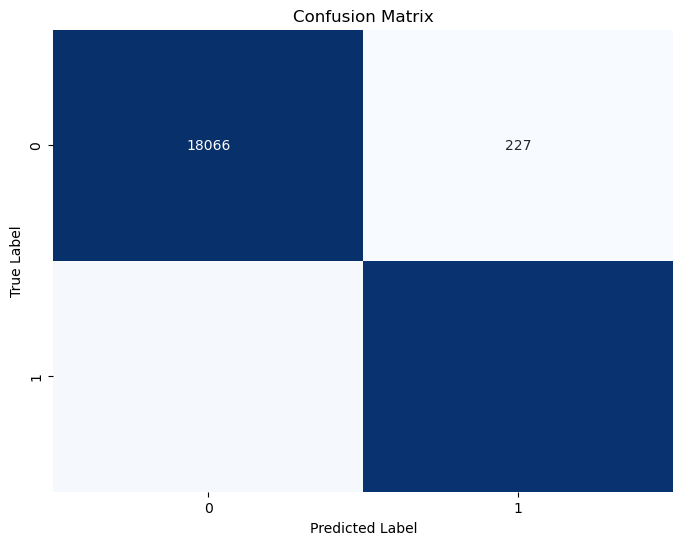

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### using RandomForest Classifier

In [38]:
# Initialize base classifier (e.g., Decision Tree)
base_classifier = RandomForestClassifier(random_state=42)

# Initialize BaggingClassifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train the BaggingClassifier
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

In [43]:
# Make predictions
y_pred = bagging_classifier.predict(X_test)

 #Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n", cm)

# Generate a classification report
cr = classification_report(y_test, y_pred)
print("\n Classification report: \n", cr)


Accuracy: 0.9734972677595628

Confusion matrix: 
 [[17797   496]
 [  474 17833]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     18293
           1       0.97      0.97      0.97     18307

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600



In [44]:
#save the model

import joblib

# Save the model as a pickle file

filename = 'diabetes_prediction_model.pkl'

joblib.dump(bagging_classifier, filename)

['diabetes_prediction_model.pkl']

In [40]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from numpy import mean
# from numpy import std

# # evaluate the model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(bagging_classifier, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

KeyboardInterrupt: 

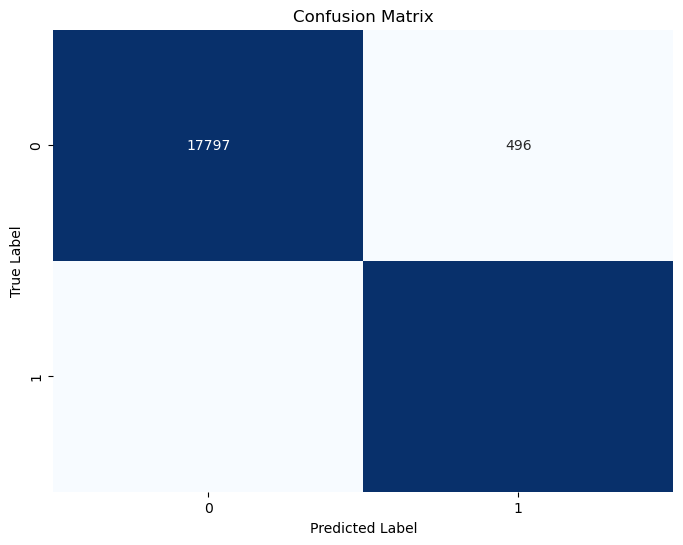

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


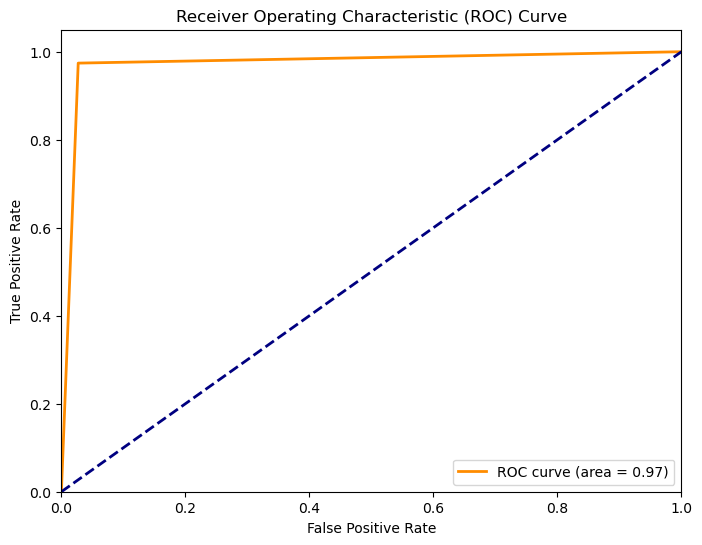

In [42]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a dictionary of the hyperparameters you want to tune, and their possible values.

param_grid = {
    'n_estimators': [5, 10, 20,100],  # the number of trees in the forest
    'max_depth': [1, 3,7],  # the maximum depth of each tree
    'max_features': ['sqrt'],  # the number of features to consider at each split
    'min_samples_split': [2,5,10],  # the minimum number of samples required to split a node
    'min_samples_leaf': [1,2,4],  # the minimum number of samples required to be at a leaf node
    'bootstrap': [False],  # whether to use bootstrap samples when building trees
    'criterion': ['gini']  # the function to measure the quality of a split
}

In [ ]:
# Create an instance of the RandomForestClassifier class
rf = RandomForestClassifier()

# Create an instance of the GridSearchCV class
grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid,
                              cv=2,
                              scoring='accuracy',
                              n_jobs=-1,
                              verbose=2)

In [ ]:
# Fit the grid search object on the training data
grid_search_rf.fit(X_train, y_train)

best_model_rf = grid_search_rf.best_estimator_

best_params_rf = grid_search_rf.best_params_


Fitting 2 folds for each of 108 candidates, totalling 216 fits


In [ ]:
# Best RF parameters:
print("Best Random Forest parameters:")
print(best_params_rf)


Best Random Forest parameters:
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 10}


In [ ]:
# Evaluate the best model on the testing data
y_pred = best_model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n", cm)

# Generate a classification report
cr = classification_report(y_test, y_pred)
print("\n Classification report: \n", cr)

Accuracy: 0.9162021857923497

Confusion matrix: 
 [[16552  1741]
 [ 1326 16981]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92     18293
           1       0.91      0.93      0.92     18307

    accuracy                           0.92     36600
   macro avg       0.92      0.92      0.92     36600
weighted avg       0.92      0.92      0.92     36600



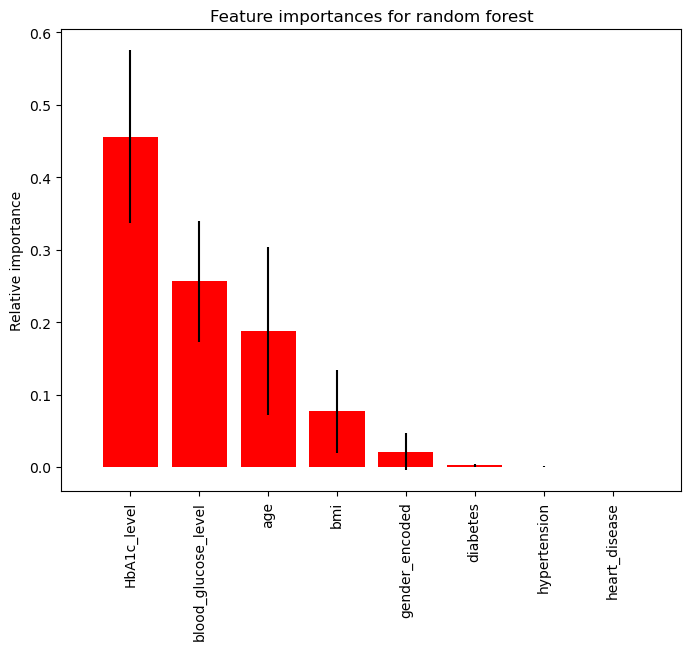

[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=5; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, 

[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=5; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=5; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, mi

[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.5s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   5.5s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   5.2s
[CV] END bootstrap=False, criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=

[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, 

In [ ]:
# Get the feature names
feature_names = Diab_df.columns

# Get the feature importances and their standard deviations
importances = best_model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model_rf.estimators_], axis=0)

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances with error bars
plt.figure(figsize=(8, 6))
plt.title("Feature importances for random forest")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Relative importance")
plt.show()